In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt


In [ ]:
data = pd.read_csv('digit_data.csv')
data

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB


In [ ]:
data = np.array(data)
m, n = data.shape
np.random.shuffle(data) # shuffle before splitting into dev and training sets

In [ ]:
data_test = data[0:1000].T
Y_test = data_test[0]
X_test = data_test[1:n]
X_test = X_test / 255.

In [ ]:
data_train = data[1000:m].T
Y_train = data_train[0]
X_train = data_train[1:n]
X_train = X_train / 255.
_,m_train = X_train.shape

In [ ]:
Y_train

array([6, 8, 1, ..., 8, 0, 2])

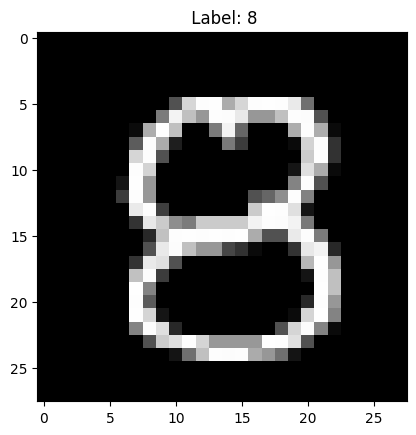

In [ ]:
# Generate a random index in the range dedicated for training images
random_index = np.random.randint(0, m_train)

# Plot the image corresponding to the generated index
def plot_image_with_label(index, X, Y):
    current_image = X[:, index].reshape((28, 28)) * 255
    label = Y[index]
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.title(f" Label: {label}")
    plt.show()

plot_image_with_label(random_index, X_train, Y_train)

In [ ]:
def init_params():
    W1 = np.random.rand(10, 784) - 0.5
    b1 = np.random.rand(10, 1) - 0.5
    W2 = np.random.rand(10, 10) - 0.5
    b2 = np.random.rand(10, 1) - 0.5
    return W1, b1, W2, b2

In [ ]:
def ReLU(Z):
    return np.maximum(Z, 0)


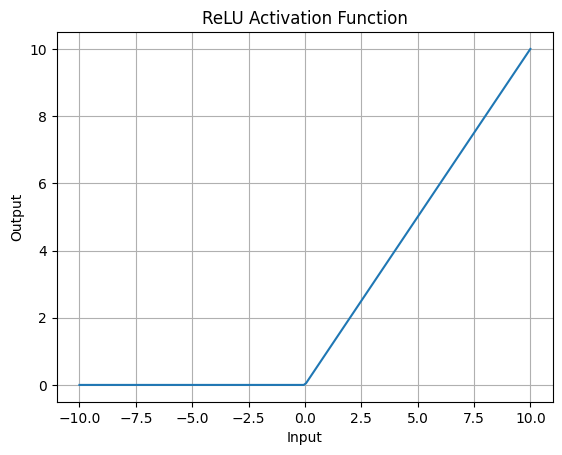

In [ ]:
def plot_activation_function(input_range, activation_function, title):
    plt.plot(input_range, activation_function(input_range))
    plt.title(title)
    plt.xlabel('Input')
    plt.ylabel('Output')
    plt.grid()
    plt.show()

# Generate a range of values for the input
x_range = np.linspace(-10, 10, 200)

# Plot the ReLU activation function
plot_activation_function(x_range, ReLU, 'ReLU Activation Function')

In [ ]:
def ReLU_deriv(Z):
    return Z > 0

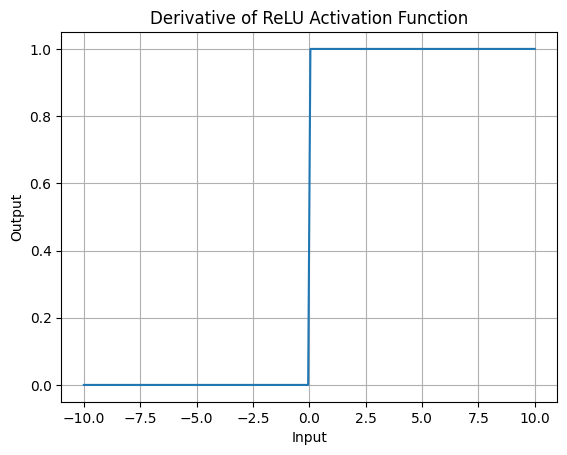

In [ ]:
# Plot the derivative of ReLU activation function
plot_activation_function(x_range, ReLU_deriv, 'Derivative of ReLU Activation Function')

In [ ]:
def softmax(Z):
    A = np.exp(Z) / sum(np.exp(Z))
    return A

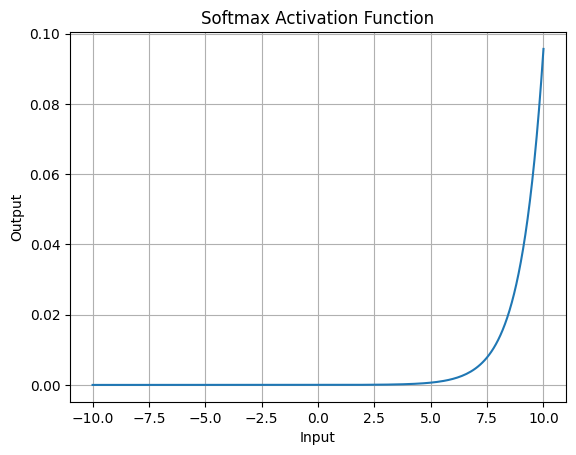

In [ ]:
# Plot the softmax activation function
plot_activation_function(x_range, softmax, 'Softmax Activation Function')

In [ ]:
def forward_prop(W1, b1, W2, b2, X):
    Z1 = W1.dot(X) + b1
    A1 = ReLU(Z1)
    Z2 = W2.dot(A1) + b2
    A2 = softmax(Z2)
    return Z1, A1, Z2, A2

In [ ]:
def one_hot(Y):
    Y = Y.astype(int)  # Convert Y to integer type
    one_hot_Y = np.zeros((Y.size, Y.max() + 1))
    one_hot_Y[np.arange(Y.size), Y] = 1
    one_hot_Y = one_hot_Y.T
    return one_hot_Y

# def one_hot(Y):
#     one_hot_Y = np.zeros((Y.size, Y.max() + 1))
#     one_hot_Y[np.arange(Y.size), Y] = 1
#     one_hot_Y = one_hot_Y.T
#     return one_hot_Y

In [ ]:
# Example ground truth vector
Y = np.array([0, 2, 1, 0, 3])

# Apply one-hot encoding
one_hot_matrix = one_hot(Y)
print(one_hot_matrix)

[[1. 0. 0. 1. 0.]
 [0. 0. 1. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 1.]]


In [ ]:
def backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y):
    one_hot_Y = one_hot(Y)
    dZ2 = A2 - one_hot_Y
    dW2 = 1 / m * dZ2.dot(A1.T)
    db2 = 1 / m * np.sum(dZ2)
    # db2 =  1 / m * np.sum(dZ2, axis=1).reshape(-1, 1)
    dZ1 = W2.T.dot(dZ2) * ReLU_deriv(Z1)
    dW1 = 1 / m * dZ1.dot(X.T)
    db1 = 1 / m * np.sum(dZ1)
    # db1 = 1 / m * np.sum(dZ1, axis=1).reshape(-1, 1)
    return dW1, db1, dW2, db2

In [ ]:
def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):
    W1 = W1 - alpha * dW1
    b1 = b1 - alpha * db1
    W2 = W2 - alpha * dW2
    b2 = b2 - alpha * db2
    return W1, b1, W2, b2

In [ ]:
def get_predictions(A2):
    return np.argmax(A2, 0)

In [ ]:
def get_accuracy(predictions, Y):
    print(predictions, Y)
    return np.sum(predictions == Y) / Y.size

In [ ]:
# Example predicted vector and ground truth vector
predicted = np.array([0, 1, 1, 0, 2])
ground_truth = np.array([0, 1, 1, 0, 3])

# Calculate accuracy
accuracy = get_accuracy(predicted, ground_truth)
print("Accuracy:", accuracy)

[0 1 1 0 2] [0 1 1 0 3]
Accuracy: 0.8


In [ ]:
def gradient_descent(X, Y, alpha, iterations):
    W1, b1, W2, b2 = init_params()
    accuracy_scores = []
    for i in range(iterations):
        Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, X)
        dW1, db1, dW2, db2 = backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y)
        W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)
        if i % 5 == 0:
           predictions = get_predictions(A2)
           accuracy = get_accuracy(predictions, Y)
           print("Iteration:", i, "Accuracy:", accuracy)
           accuracy_scores.append((i, accuracy))
    return W1, b1, W2, b2, accuracy_scores
    #         print("Iteration: ", i)
    #         predictions = get_predictions(A2)
    #         print(get_accuracy(predictions, Y))
    # return W1, b1, W2, b2

In [ ]:
W1, b1, W2, b2, accuracy_scores = gradient_descent(X_train, Y_train, 0.10, 500)

[7 6 4 ... 4 4 4] [9 9 4 ... 3 1 0]
Iteration: 0 Accuracy: 0.06404878048780488
[7 6 6 ... 2 2 0] [9 9 4 ... 3 1 0]
Iteration: 5 Accuracy: 0.1348780487804878
[7 6 6 ... 3 2 0] [9 9 4 ... 3 1 0]
Iteration: 10 Accuracy: 0.1992439024390244
[7 9 6 ... 3 2 0] [9 9 4 ... 3 1 0]
Iteration: 15 Accuracy: 0.23934146341463414
[7 9 6 ... 3 2 0] [9 9 4 ... 3 1 0]
Iteration: 20 Accuracy: 0.2761219512195122
[7 9 6 ... 3 2 0] [9 9 4 ... 3 1 0]
Iteration: 25 Accuracy: 0.307390243902439
[7 9 6 ... 3 3 0] [9 9 4 ... 3 1 0]
Iteration: 30 Accuracy: 0.33402439024390246
[7 9 6 ... 3 3 0] [9 9 4 ... 3 1 0]
Iteration: 35 Accuracy: 0.3595853658536585
[7 9 6 ... 3 3 0] [9 9 4 ... 3 1 0]
Iteration: 40 Accuracy: 0.38190243902439025
[7 9 6 ... 3 3 0] [9 9 4 ... 3 1 0]
Iteration: 45 Accuracy: 0.404219512195122
[7 9 6 ... 3 3 0] [9 9 4 ... 3 1 0]
Iteration: 50 Accuracy: 0.42778048780487804
[7 9 6 ... 3 3 0] [9 9 4 ... 3 1 0]
Iteration: 55 Accuracy: 0.4509268292682927
[7 9 6 ... 3 1 0] [9 9 4 ... 3 1 0]
Iteration: 60 A

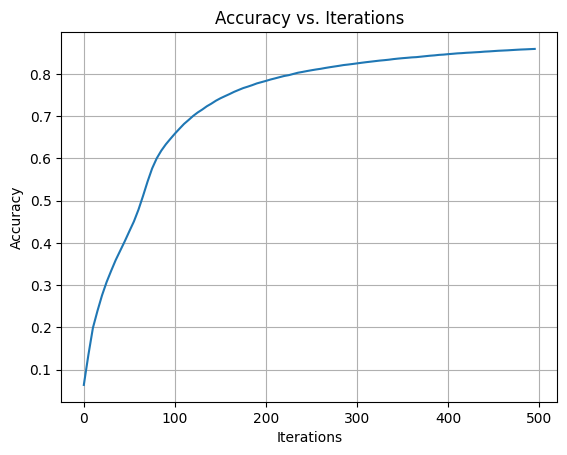

In [ ]:
# Extract iteration numbers and accuracy scores from the list
iterations, accuracies = zip(*accuracy_scores)

# Plot accuracy vs. iterations
plt.plot(iterations, accuracies)
plt.title('Accuracy vs. Iterations')
plt.xlabel('Iterations')
plt.ylabel('Accuracy')
plt.grid()
plt.show()

In [ ]:
def make_predictions(X, W1, b1, W2, b2):
    _, _, _, A2 = forward_prop(W1, b1, W2, b2, X)
    predictions = get_predictions(A2)
    return predictions

def test_prediction(index, W1, b1, W2, b2):
    current_image = X_train[:, index, None]
    prediction = make_predictions(X_train[:, index, None], W1, b1, W2, b2)
    label = Y_train[index]
    print("Prediction: ", prediction)
    print("Label: ", label)

    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()

Prediction:  [9]
Label:  9


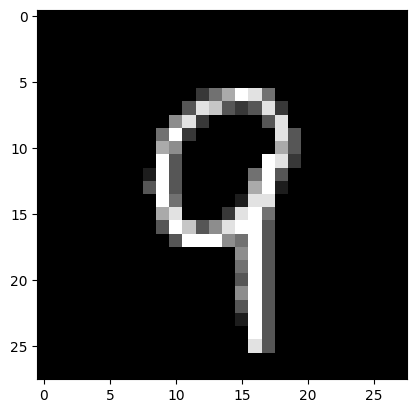

Prediction:  [3]
Label:  3


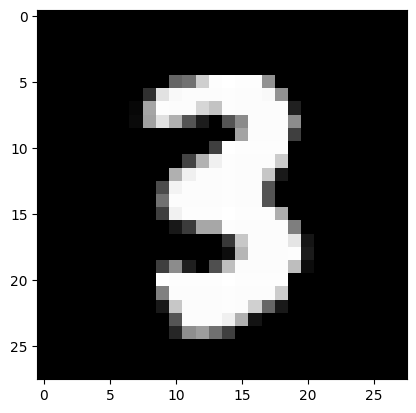

Prediction:  [1]
Label:  1


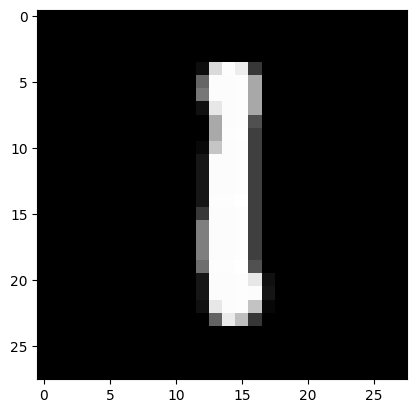

Prediction:  [6]
Label:  6


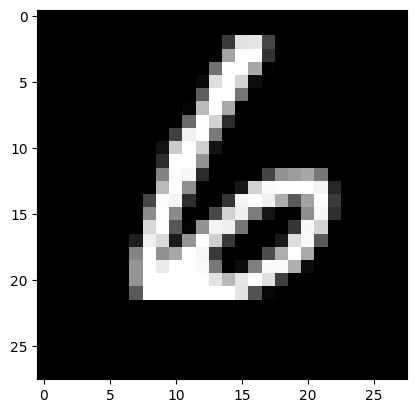

In [ ]:
test_prediction(0, W1, b1, W2, b2)
test_prediction(8, W1, b1, W2, b2)
test_prediction(5, W1, b1, W2, b2)
test_prediction(7, W1, b1, W2, b2)

Prediction:  [5]
Label:  5


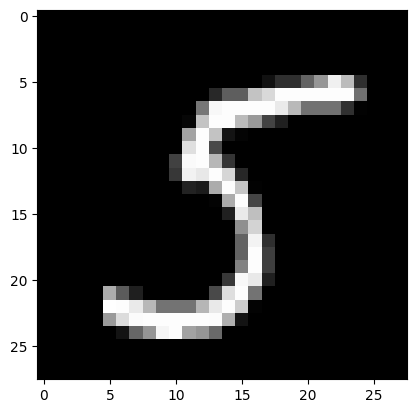

In [ ]:
test_prediction(168, W1, b1, W2, b2)

In [ ]:
test_predictions = make_predictions(X_test, W1, b1, W2, b2)
get_accuracy(test_predictions, Y_test)

[7 3 3 6 1 1 1 7 9 2 9 0 1 2 0 0 6 4 0 7 0 0 1 6 8 4 1 4 1 7 3 5 9 9 7 0 2
 6 4 9 1 1 5 2 4 4 6 2 0 4 6 6 8 1 3 9 1 5 8 5 1 6 2 4 2 3 7 3 0 4 2 2 9 6
 3 3 6 3 1 6 4 6 2 0 6 6 2 6 8 7 6 6 8 7 9 1 9 2 4 5 1 0 4 9 6 9 3 0 0 9 8
 6 4 4 2 9 3 6 0 8 0 0 2 5 6 4 6 1 7 0 1 4 6 4 8 9 7 5 1 0 7 8 3 5 4 1 7 9
 5 8 7 4 1 5 3 0 0 4 2 6 6 9 5 9 4 4 9 3 1 0 1 7 8 3 3 9 1 0 1 3 4 7 8 0 6
 7 8 5 6 4 6 1 4 8 0 5 2 4 9 1 2 4 0 4 7 7 4 3 1 8 2 3 9 7 2 8 4 0 4 3 3 5
 2 2 3 3 7 1 3 8 2 8 1 4 6 5 8 2 8 6 8 1 6 3 2 8 8 8 8 9 9 8 1 4 8 6 1 7 8
 7 0 2 0 3 2 1 0 9 9 3 7 8 8 0 3 0 3 4 0 4 8 7 8 8 9 8 9 2 9 3 0 3 4 8 6 2
 3 0 3 2 0 4 5 4 0 4 0 6 5 1 9 4 0 3 6 1 7 3 4 8 8 2 8 4 2 5 8 4 3 1 7 3 4
 9 7 4 5 3 8 5 8 6 3 4 5 0 5 2 0 8 6 8 2 1 9 7 7 2 5 4 0 3 7 1 8 8 7 8 6 7
 4 0 2 7 0 7 5 9 5 4 1 5 1 2 1 6 0 2 4 1 4 0 2 8 9 8 3 9 2 5 5 8 9 9 7 0 5
 3 2 8 8 6 4 4 9 4 1 9 8 2 1 5 1 1 0 3 7 7 8 3 4 4 4 6 1 0 4 9 4 4 6 6 5 6
 1 9 8 9 5 1 8 4 9 2 0 7 9 0 3 3 4 1 7 0 8 2 3 7 1 6 1 8 9 8 7 3 4 0 4 0 9
 9 8 0 9 5 5 2 0 9 7 1 4 

0.852

# Multiple hidden layer


In [ ]:
def init_params():
    W1 = np.random.rand(10, 784) - 0.5
    b1 = np.random.rand(10, 1) - 0.5


    W2 = np.random.rand(15, 10) - 0.5
    b2 = np.random.rand(15, 1) - 0.5

    W3 = np.random.rand(12,15) - 0.5
    b3 = np.random.rand(12, 1) - 0.5

    W4 = np.random.rand(10,12) - 0.5
    b4 = np.random.rand(10, 1) - 0.5

    return W1, b1, W2, b2, W3, b3, W4, b4


In [ ]:
def sigmoid(x):

    return 1 / (1 + np.exp(-x))

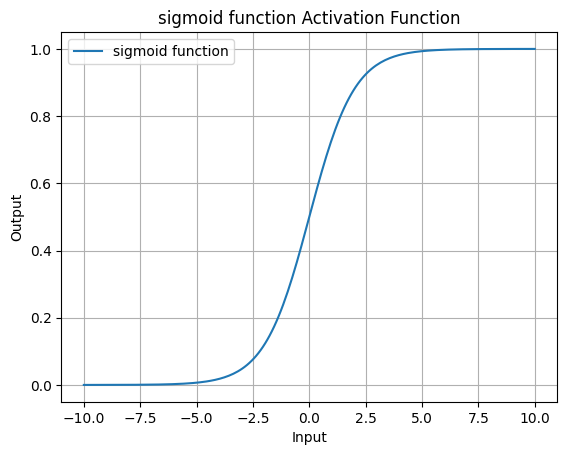

In [ ]:
plot_activation_function(sigmoid, 'sigmoid function', x_range)

In [ ]:
def sigmoid_derivative(x):
    return sigmoid(x) * (1 - sigmoid(x))

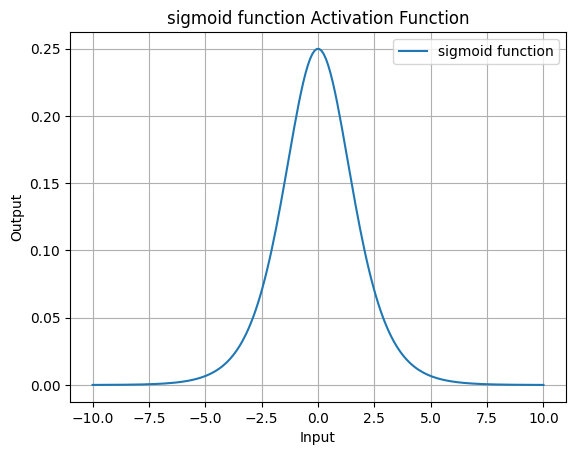

In [ ]:
plot_activation_function(sigmoid_derivative, 'sigmoid function', x_range)

In [ ]:
def tanh(x):

    return np.tanh(x)

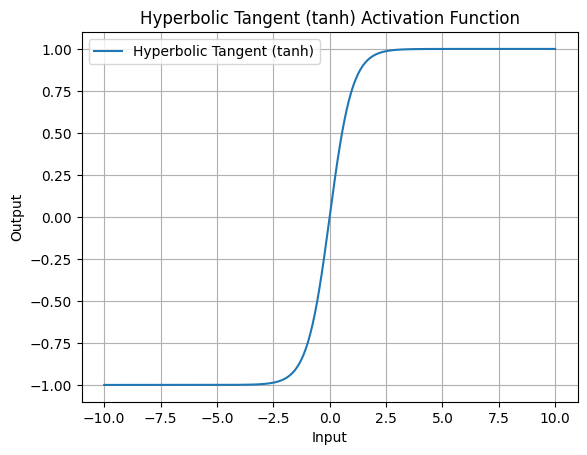

In [ ]:
def plot_activation_function(func, func_name, x_range):
    y = func(x_range)
    plt.plot(x_range, y, label=func_name)
    plt.title(f'{func_name} Activation Function')
    plt.xlabel('Input')
    plt.ylabel('Output')
    plt.legend()
    plt.grid()
    plt.show()

# Generate a range of values for the input
x_range = np.linspace(-10, 10, 200)

# Plot the tanh activation function using the plot_activation_function function
plot_activation_function(tanh, 'Hyperbolic Tangent (tanh)', x_range)

In [ ]:
def tanh_derivative(x):
    return 1 - tanh(x)**2

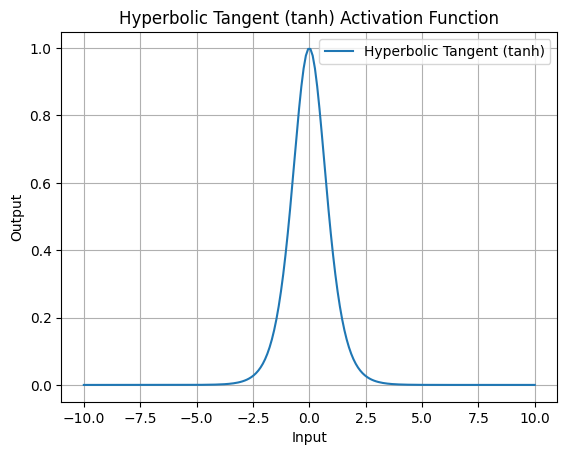

In [ ]:
plot_activation_function(tanh_derivative, 'Hyperbolic Tangent (tanh)', x_range)

In [ ]:
def forward_prop(W1, b1, W2, b2,W3,b3,W4,b4, X):
    Z1 = W1.dot(X) + b1
    A1 = ReLU(Z1)

    Z2 = W2.dot(A1) + b2
    A2 = sigmoid(Z2)

    Z3 = W3.dot(A2) + b3
    A3 = tanh(Z3)

    Z4 = W4.dot(A3) + b4
    A4 = softmax(Z4)
    return Z1, A1, Z2, A2, Z3,A3,Z4,A4

In [ ]:
def one_hot(Y):
    Y = Y.astype(int)  # Convert Y to integer type
    one_hot_Y = np.zeros((Y.size, Y.max() + 1))
    one_hot_Y[np.arange(Y.size), Y] = 1
    one_hot_Y = one_hot_Y.T
    return one_hot_Y

In [ ]:
def backward_prop(Z1, A1, Z2, A2, Z3, A3, Z4,A4, W1, W2,W3,W4, X, Y):
    one_hot_Y = one_hot(Y)

    dZ4 = A4 - one_hot_Y
    dW4 = 1 / m * dZ4.dot(A3.T)
    db4 = 1 / m * np.sum(dZ4)

    dZ3 = W4.T.dot(dZ4) * tanh_derivative(Z3)
    dW3 = 1 / m * dZ3.dot(A2.T)
    db3 = 1 / m * np.sum(dZ3)

    dZ2 = W3.T.dot(dZ3) * sigmoid_derivative(Z2)
    dW2 = 1 / m * dZ2.dot(A1.T)
    db2 = 1 / m * np.sum(dZ2)

    dZ1 = W2.T.dot(dZ2) * ReLU_deriv(Z1)
    dW1 = 1 / m * dZ1.dot(X.T)
    db1 = 1 / m * np.sum(dZ1)




    return dW1, db1, dW2, db2, dW3, db3, dW4,db4

In [ ]:

def update_params(W1, b1, W2, b2,W3,b3,W4,b4, dW1, db1, dW2, db2,dW3,db3,dW4,db4, alpha):
    W1 = W1 - alpha * dW1
    b1 = b1 - alpha * db1

    W2 = W2 - alpha * dW2
    b2 = b2 - alpha * db2

    W3 = W3 - alpha * dW3
    b3 = b3 - alpha * db3

    W4 = W4 - alpha * dW4
    b4 = b4 - alpha * db4

    return W1, b1, W2, b2, W3, b3, W4, b4

In [ ]:
def get_predictions(A2):
    return np.argmax(A2, 0)


In [ ]:
def get_accuracy(predictions, Y):
    print(predictions, Y)
    return np.sum(predictions == Y) / Y.size
# Example predicted vector and ground truth vector
predicted = np.array([0, 1, 1, 0, 2])
ground_truth = np.array([0, 1, 1, 0, 3])
# Calculate accuracy
accuracy = get_accuracy(predicted, ground_truth)
print("Accuracy:", accuracy)


[0 1 1 0 2] [0 1 1 0 3]
Accuracy: 0.8


In [ ]:

def gradient_descent(X, Y, alpha, iterations):
    W1, b1, W2, b2, W3, b3, W4, b4 = init_params()
    accuracy_scores = []
    for i in range(iterations):
        Z1, A1, Z2, A2, Z3, A3, Z4, A4 = forward_prop(W1, b1, W2, b2,W3,b3,W4,b4, X)
        dW1, db1, dW2, db2, dW3, db3, dW4,db4 = backward_prop(Z1, A1, Z2, A2, Z3, A3, Z4,A4, W1, W2,W3,W4, X, Y)
        W1, b1, W2, b2, W3, b3, W4, b4 = update_params(W1, b1, W2, b2,W3,b3,W4,b4, dW1, db1, dW2, db2,dW3,db3,dW4,db4, alpha)
        if i % 10 == 0:
            print("Iteration: ", i)
            predictions = get_predictions(A4)
            accuracy = get_accuracy(predictions, Y)
            print(accuracy)
            accuracy_scores.append((i, accuracy))

    # Convert accuracy_scores to separate lists for plotting
    iterations, accuracies = zip(*accuracy_scores)

    # Plotting accuracy vs iterations
    plt.plot(iterations, accuracies)
    plt.xlabel('Iterations')
    plt.ylabel('Accuracy')
    plt.title('Accuracy vs Iterations')
    plt.show()

    return W1, b1, W2, b2, W3,b3,W4,b4

Iteration:  0
[9 9 9 ... 9 9 9] [7 4 3 ... 5 7 1]
0.09597560975609756
Iteration:  10
[9 9 9 ... 9 9 0] [7 4 3 ... 5 7 1]
0.09553658536585366
Iteration:  20
[4 0 3 ... 9 1 0] [7 4 3 ... 5 7 1]
0.14826829268292682
Iteration:  30
[4 0 3 ... 3 1 0] [7 4 3 ... 5 7 1]
0.19653658536585367
Iteration:  40
[4 7 3 ... 3 1 2] [7 4 3 ... 5 7 1]
0.21373170731707317
Iteration:  50
[4 2 3 ... 3 1 2] [7 4 3 ... 5 7 1]
0.2238048780487805
Iteration:  60
[4 2 3 ... 3 1 2] [7 4 3 ... 5 7 1]
0.2370731707317073
Iteration:  70
[4 2 3 ... 3 1 2] [7 4 3 ... 5 7 1]
0.2509268292682927
Iteration:  80
[4 4 3 ... 3 1 2] [7 4 3 ... 5 7 1]
0.26278048780487806
Iteration:  90
[4 4 3 ... 3 1 2] [7 4 3 ... 5 7 1]
0.2749268292682927
Iteration:  100
[4 4 3 ... 3 1 2] [7 4 3 ... 5 7 1]
0.28621951219512193
Iteration:  110
[4 4 3 ... 3 1 2] [7 4 3 ... 5 7 1]
0.29753658536585365
Iteration:  120
[4 4 3 ... 3 1 2] [7 4 3 ... 5 7 1]
0.311
Iteration:  130
[4 4 3 ... 3 1 2] [7 4 3 ... 5 7 1]
0.3245609756097561
Iteration:  140
[4 4 3

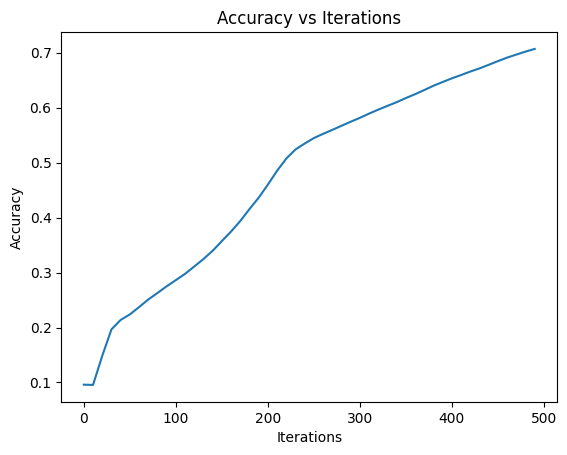

In [ ]:
W1, b1, W2, b2, W3,b3,W4,b4 = gradient_descent(X_train, Y_train, 0.10, 500)

In [ ]:
def make_predictions(X, W1, b1, W2, b2,W3,b3,W4,b4):
    Z1, A1, Z2, A2, Z3,A3,Z4,A4 = forward_prop(W1, b1, W2, b2,W3,b3,W4,b4, X)
    predictions = get_predictions(A4)
    return predictions

In [ ]:
def test_prediction(index, W1, b1, W2, b2,W3,b3,W4,b4):
    current_image = X_train[:, index, None]
    prediction = make_predictions(X_train[:, index, None], W1, b1, W2, b2,W3,b3,W4,b4)
    label = Y_train[index]
    print("Prediction: ", prediction)
    print("Label: ", label)

    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()

Prediction:  [4]
Label:  7


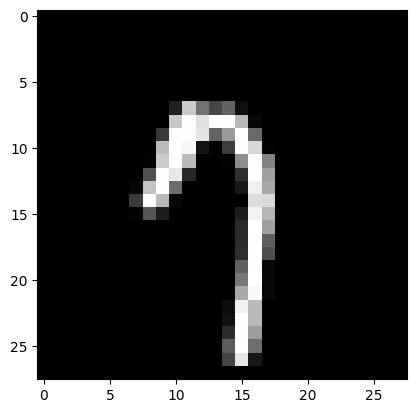

Prediction:  [4]
Label:  4


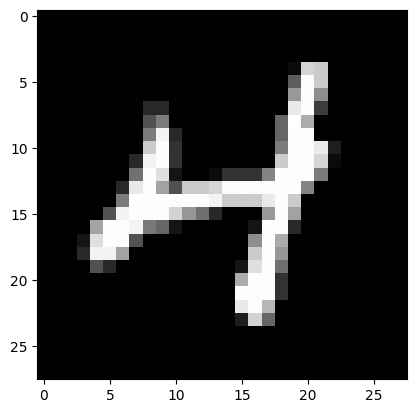

Prediction:  [3]
Label:  3


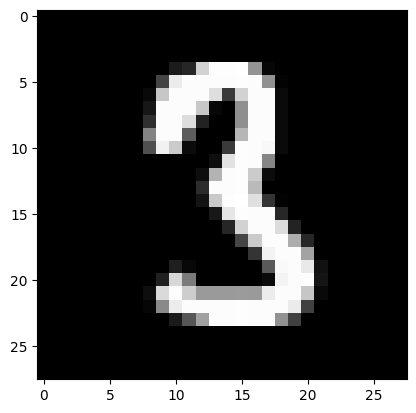

Prediction:  [7]
Label:  7


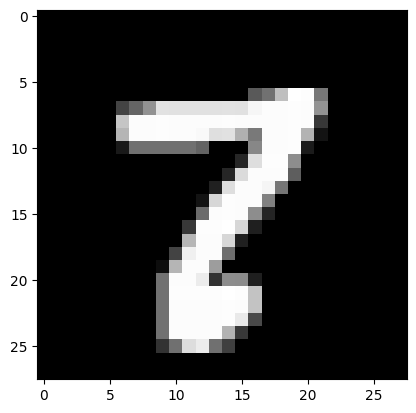

In [ ]:
test_prediction(0, W1, b1, W2, b2,W3,b3,W4,b4)
test_prediction(1, W1, b1, W2, b2,W3,b3,W4,b4)
test_prediction(2, W1, b1, W2, b2,W3,b3,W4,b4)
test_prediction(3, W1, b1, W2, b2,W3,b3,W4,b4)

In [ ]:
test_predictions = make_predictions(X_test, W1, b1, W2, b2, W3, b3, W4, b4)
get_accuracy(test_predictions, Y_test)

[7 6 6 7 0 4 6 8 1 5 4 0 0 2 4 1 0 9 1 1 0 7 9 2 0 8 8 0 0 3 4 0 6 3 4 6 7
 6 2 7 0 4 7 8 7 7 6 3 2 7 6 4 7 1 3 1 2 4 3 6 6 0 1 3 6 9 7 3 4 4 4 0 6 8
 7 5 0 6 0 6 6 9 1 5 6 9 0 1 6 2 3 7 2 5 7 0 0 3 4 2 9 4 4 2 4 7 6 6 2 2 3
 3 4 0 2 7 3 6 6 2 7 2 8 0 7 3 7 4 4 3 1 3 0 4 2 8 4 7 4 8 7 6 4 9 3 8 5 7
 6 1 1 4 2 8 3 4 7 7 6 6 1 0 0 5 7 3 5 9 0 4 9 0 2 0 4 6 6 4 4 7 5 6 2 9 6
 4 8 1 3 0 6 0 9 0 8 4 4 9 5 1 8 8 1 3 8 6 0 4 7 3 7 7 2 0 9 0 4 2 6 7 0 7
 0 4 7 8 7 7 7 3 0 3 1 3 2 9 3 2 8 0 2 2 8 0 2 0 9 4 0 9 4 6 3 7 8 3 9 3 3
 2 6 3 4 0 1 1 8 0 0 4 7 3 3 2 7 1 0 6 9 6 2 9 7 1 0 9 4 4 0 6 1 0 5 2 1 2
 6 2 7 7 4 6 1 6 3 3 6 0 6 7 3 7 9 4 9 1 0 4 6 8 3 8 3 6 4 3 4 0 3 3 1 7 4
 0 2 7 5 3 7 8 2 2 2 1 6 3 7 2 2 1 2 0 8 4 4 0 4 2 8 8 8 7 3 7 3 7 0 7 7 3
 0 2 3 0 0 1 7 6 8 7 7 8 8 4 9 0 7 2 2 8 0 0 0 6 9 2 3 0 4 1 4 8 1 9 6 3 9
 4 1 3 2 0 9 2 5 0 1 7 8 9 1 4 0 0 3 3 0 6 7 7 4 0 6 0 6 0 7 3 2 0 8 5 6 6
 8 0 1 8 8 1 5 9 0 7 0 1 6 0 1 6 5 0 4 2 3 4 3 9 3 0 2 4 0 6 3 2 1 0 9 6 0
 4 7 4 1 1 4 7 0 8 2 0 8 

0.684

# Different initialization


In [ ]:
def init_params_kaiming():
    def kaiming_initializer(n_in):
        return np.random.normal(0, np.sqrt(2 / n_in))

    W1 = kaiming_initializer(784) * np.random.randn(10, 784)
    b1 = np.zeros((10, 1))

    W2 = kaiming_initializer(10) * np.random.randn(15, 10)
    b2 = np.zeros((15, 1))

    W3 = kaiming_initializer(15) * np.random.randn(12, 15)
    b3 = np.zeros((12, 1))

    W4 = kaiming_initializer(12) * np.random.randn(10, 12)
    b4 = np.zeros((10, 1))

    return W1, b1, W2, b2, W3, b3, W4, b4

In [ ]:

def init_params_xavier():
    def xavier_initializer(n_in, n_out):
        bound = np.sqrt(6 / (n_in + n_out))
        return np.random.uniform(-bound, bound)

    W1 = xavier_initializer(784, 10) * np.random.rand(10, 784)
    b1 = np.random.rand(10, 1) - 0.5

    W2 = xavier_initializer(10, 15) * np.random.rand(15, 10)
    b2 = np.random.rand(15, 1) - 0.5

    W3 = xavier_initializer(15, 12) * np.random.rand(12, 15)
    b3 = np.random.rand(12, 1) - 0.5

    W4 = xavier_initializer(12, 10) * np.random.rand(10, 12)
    b4 = np.random.rand(10, 1) - 0.5

    return W1, b1, W2, b2, W3, b3, W4, b4


In [ ]:

def gradient_descent(X, Y, alpha, iterations):
    W1, b1, W2, b2, W3, b3, W4, b4 = init_params_xavier()
    accuracy_scores = []  # To store accuracy scores at different iterations
    for i in range(iterations):
        Z1, A1, Z2, A2, Z3, A3, Z4, A4 = forward_prop(W1, b1, W2, b2,W3,b3,W4,b4, X)
        dW1, db1, dW2, db2, dW3, db3, dW4,db4 = backward_prop(Z1, A1, Z2, A2, Z3, A3, Z4,A4, W1, W2,W3,W4, X, Y)
        W1, b1, W2, b2, W3, b3, W4, b4 = update_params(W1, b1, W2, b2,W3,b3,W4,b4, dW1, db1, dW2, db2,dW3,db3,dW4,db4, alpha)
        if i % 10 == 0:
            print("Iteration: ", i)
            predictions = get_predictions(A4)
            accuracy = get_accuracy(predictions, Y)
            print(accuracy)
            accuracy_scores.append((i, accuracy))
    # Convert accuracy_scores to separate lists for plotting
    iterations, accuracies = zip(*accuracy_scores)

    # Plotting accuracy vs iterations
    plt.plot(iterations, accuracies)
    plt.xlabel('Iterations')
    plt.ylabel('Accuracy')
    plt.title('Accuracy vs Iterations')
    plt.show()

    return W1, b1, W2, b2, W3,b3,W4,b4

Iteration:  0
[1 1 1 ... 1 1 1] [2 0 9 ... 3 6 2]
0.11129268292682927
Iteration:  10
[1 1 1 ... 1 1 1] [2 0 9 ... 3 6 2]
0.11129268292682927
Iteration:  20
[1 1 1 ... 1 1 1] [2 0 9 ... 3 6 2]
0.11129268292682927
Iteration:  30
[1 1 1 ... 1 1 1] [2 0 9 ... 3 6 2]
0.11129268292682927
Iteration:  40
[1 7 1 ... 7 1 7] [2 0 9 ... 3 6 2]
0.1187560975609756
Iteration:  50
[1 7 1 ... 7 1 7] [2 0 9 ... 3 6 2]
0.14817073170731707
Iteration:  60
[7 7 1 ... 7 7 7] [2 0 9 ... 3 6 2]
0.15946341463414634
Iteration:  70
[7 7 1 ... 7 7 7] [2 0 9 ... 3 6 2]
0.15734146341463415
Iteration:  80
[1 7 1 ... 7 7 7] [2 0 9 ... 3 6 2]
0.14795121951219511
Iteration:  90
[1 7 1 ... 7 1 7] [2 0 9 ... 3 6 2]
0.13663414634146342
Iteration:  100
[1 7 1 ... 7 1 7] [2 0 9 ... 3 6 2]
0.12814634146341464
Iteration:  110
[1 2 1 ... 7 1 7] [2 0 9 ... 3 6 2]
0.12436585365853658
Iteration:  120
[1 2 1 ... 7 1 2] [2 0 9 ... 3 6 2]
0.12795121951219512
Iteration:  130
[1 2 1 ... 1 1 2] [2 0 9 ... 3 6 2]
0.1363658536585366
Itera

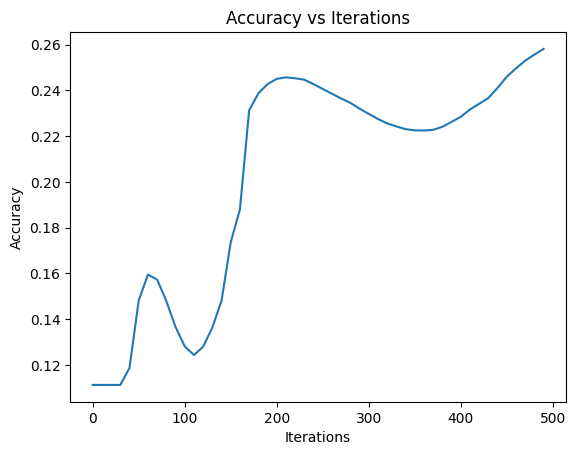

In [ ]:
W1, b1, W2, b2, W3,b3,W4,b4 = gradient_descent(X_train, Y_train, 0.10, 500)

In [ ]:
def make_predictions(X, W1, b1, W2, b2,W3,b3,W4,b4):
    Z1, A1, Z2, A2, Z3,A3,Z4,A4 = forward_prop(W1, b1, W2, b2,W3,b3,W4,b4, X)
    predictions = get_predictions(A4)
    return predictions

def test_prediction(index, W1, b1, W2, b2,W3,b3,W4,b4):
    current_image = X_train[:, index, None]
    prediction = make_predictions(X_train[:, index, None], W1, b1, W2, b2,W3,b3,W4,b4)
    label = Y_train[index]
    print("Prediction: ", prediction)
    print("Label: ", label)

    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()

Prediction:  [9]
Label:  2


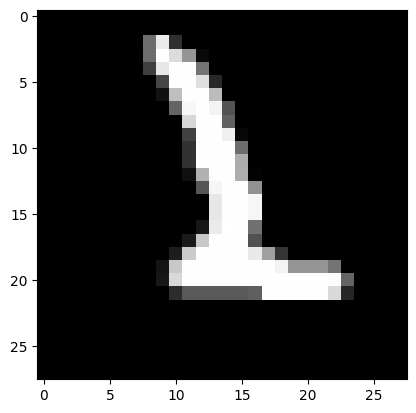

Prediction:  [0]
Label:  0


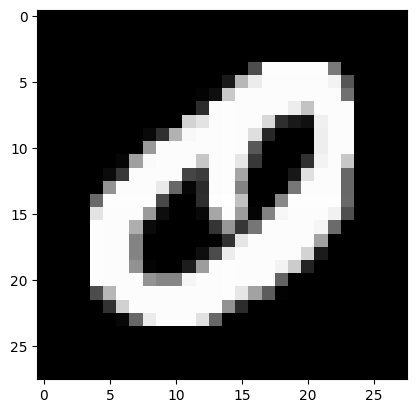

Prediction:  [9]
Label:  9


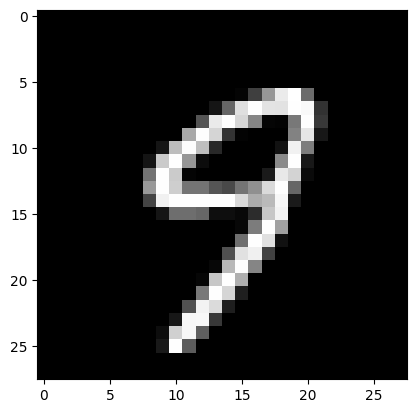

Prediction:  [0]
Label:  6


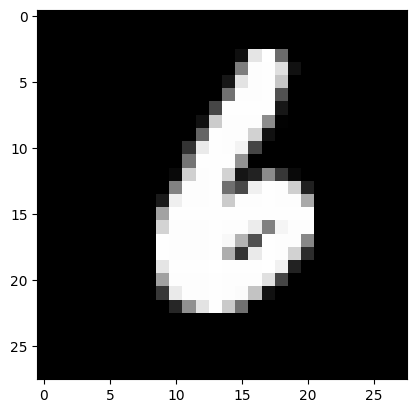

In [ ]:
test_prediction(0, W1, b1, W2, b2,W3,b3,W4,b4)
test_prediction(1, W1, b1, W2, b2,W3,b3,W4,b4)
test_prediction(2, W1, b1, W2, b2,W3,b3,W4,b4)
test_prediction(3, W1, b1, W2, b2,W3,b3,W4,b4)

In [ ]:
test_predictions = make_predictions(X_test, W1, b1, W2, b2, W3, b3, W4, b4)
get_accuracy(test_predictions, Y_test)

[4 6 1 0 0 3 2 1 7 6 0 0 7 0 1 6 0 1 0 7 2 0 2 6 0 0 1 0 3 9 1 9 0 7 1 9 7
 1 9 2 3 6 0 6 1 9 6 6 1 9 2 1 9 6 6 0 1 0 9 1 0 9 1 6 4 1 6 0 9 6 4 1 0 9
 2 1 7 1 1 3 6 0 6 7 1 1 0 1 1 7 9 1 1 1 1 9 6 2 2 0 6 0 0 1 9 0 9 0 3 6 1
 0 6 3 7 0 0 3 1 6 9 9 1 1 0 0 0 6 9 6 1 0 0 0 6 6 9 3 1 0 0 0 0 1 0 1 1 1
 3 6 6 3 0 7 4 0 2 6 6 7 6 9 0 1 6 0 1 0 6 9 9 9 6 0 2 0 3 1 9 0 3 1 1 4 6
 4 7 1 3 0 0 0 0 0 2 6 2 0 9 1 0 9 3 0 9 1 9 1 1 0 6 0 0 0 1 1 0 1 0 0 3 0
 0 2 0 0 6 9 6 1 6 6 6 9 0 1 6 9 6 7 1 7 1 1 1 2 0 3 9 0 0 4 0 1 6 1 4 9 0
 0 0 6 0 0 1 0 3 9 7 9 0 0 7 0 3 0 2 1 7 9 1 6 1 1 9 1 0 4 6 6 1 0 7 1 3 1
 4 0 4 9 1 1 6 0 1 1 3 1 4 9 0 1 0 6 1 2 6 7 6 0 0 1 1 1 9 7 0 4 3 0 9 0 6
 2 1 1 1 0 9 6 0 4 0 6 1 1 0 2 3 1 6 0 9 6 3 6 0 7 1 6 0 1 0 3 9 6 1 1 0 0
 0 6 1 3 9 4 0 0 4 1 4 0 6 0 1 1 3 0 0 1 0 0 6 1 6 7 1 7 1 1 4 1 6 7 0 6 0
 0 0 6 6 9 9 1 0 0 3 4 9 1 1 9 0 0 1 7 6 1 7 0 6 6 1 1 9 0 1 9 9 7 1 0 6 4
 6 1 1 0 1 0 1 6 9 7 0 9 2 1 6 1 0 1 1 2 1 1 9 4 9 1 3 6 0 0 6 1 3 2 0 2 0
 0 0 1 4 0 7 3 1 6 0 9 4 

0.268

# Kaiming Initialization

In [ ]:
def init_params_kaiming():
    def kaiming_initializer(n_in):
        return np.random.normal(0, np.sqrt(2 / n_in))

    W1 = kaiming_initializer(784) * np.random.randn(10, 784)
    b1 = np.zeros((10, 1))

    W2 = kaiming_initializer(10) * np.random.randn(15, 10)
    b2 = np.zeros((15, 1))

    W3 = kaiming_initializer(15) * np.random.randn(12, 15)
    b3 = np.zeros((12, 1))

    W4 = kaiming_initializer(12) * np.random.randn(10, 12)
    b4 = np.zeros((10, 1))

    return W1, b1, W2, b2, W3, b3, W4, b4

In [ ]:
def gradient_descent(X, Y, alpha, iterations):
    W1, b1, W2, b2, W3, b3, W4, b4 = init_params_kaiming()
    accuracy_scores = []
    for i in range(iterations):
        Z1, A1, Z2, A2, Z3, A3, Z4, A4 = forward_prop(W1, b1, W2, b2,W3,b3,W4,b4, X)
        dW1, db1, dW2, db2, dW3, db3, dW4,db4 = backward_prop(Z1, A1, Z2, A2, Z3, A3, Z4,A4, W1, W2,W3,W4, X, Y)
        W1, b1, W2, b2, W3, b3, W4, b4 = update_params(W1, b1, W2, b2,W3,b3,W4,b4, dW1, db1, dW2, db2,dW3,db3,dW4,db4, alpha)
        if i % 10 == 0:
            print("Iteration: ", i)
            predictions = get_predictions(A4)
            accuracy = get_accuracy(predictions, Y)
            print(accuracy)
            accuracy_scores.append((i, accuracy))

    # Convert accuracy_scores to separate lists for plotting
    iterations, accuracies = zip(*accuracy_scores)

    # Plotting accuracy vs iterations
    plt.plot(iterations, accuracies)
    plt.xlabel('Iterations')
    plt.ylabel('Accuracy')
    plt.title('Accuracy vs Iterations')
    plt.show()

    return W1, b1, W2, b2, W3,b3,W4,b4

Iteration:  0
[6 6 6 ... 6 3 6] [7 9 2 ... 4 0 8]
0.09604878048780488
Iteration:  10
[7 7 7 ... 7 6 7] [7 9 2 ... 4 0 8]
0.16963414634146343
Iteration:  20
[7 9 5 ... 7 0 1] [7 9 2 ... 4 0 8]
0.3798048780487805
Iteration:  30
[7 9 5 ... 9 0 1] [7 9 2 ... 4 0 8]
0.43409756097560975
Iteration:  40
[9 8 5 ... 4 0 4] [7 9 2 ... 4 0 8]
0.482
Iteration:  50
[9 8 5 ... 4 0 4] [7 9 2 ... 4 0 8]
0.5221219512195122
Iteration:  60
[9 8 5 ... 4 0 8] [7 9 2 ... 4 0 8]
0.5645853658536585
Iteration:  70
[7 9 2 ... 4 0 8] [7 9 2 ... 4 0 8]
0.6065121951219512
Iteration:  80
[7 9 2 ... 4 0 8] [7 9 2 ... 4 0 8]
0.6312926829268293
Iteration:  90
[7 9 2 ... 4 0 8] [7 9 2 ... 4 0 8]
0.6479268292682927
Iteration:  100
[7 9 2 ... 4 0 8] [7 9 2 ... 4 0 8]
0.6606585365853659
Iteration:  110
[7 9 2 ... 4 0 8] [7 9 2 ... 4 0 8]
0.6739756097560976
Iteration:  120
[7 9 2 ... 4 0 8] [7 9 2 ... 4 0 8]
0.6864878048780488
Iteration:  130
[7 9 2 ... 4 0 8] [7 9 2 ... 4 0 8]
0.6998292682926829
Iteration:  140
[7 9 2 ... 

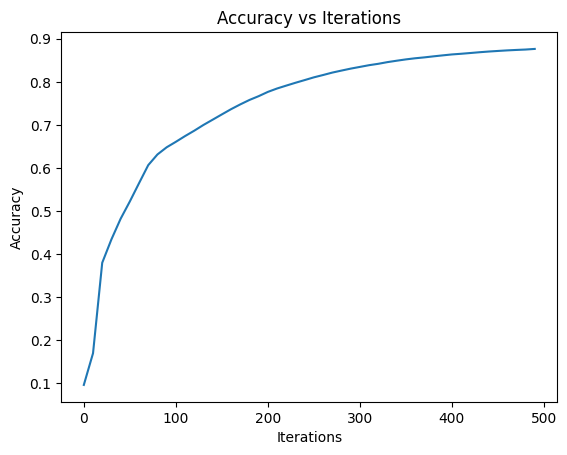

In [ ]:
W1, b1, W2, b2, W3,b3,W4,b4 = gradient_descent(X_train, Y_train, 0.10, 500)

Prediction:  [7]
Label:  7


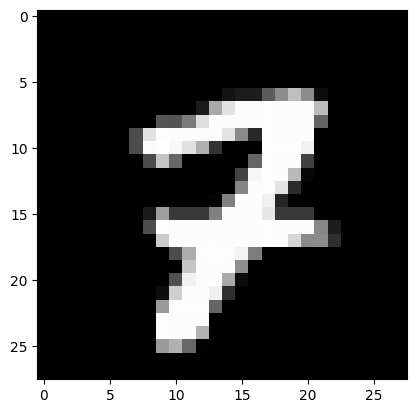

Prediction:  [9]
Label:  9


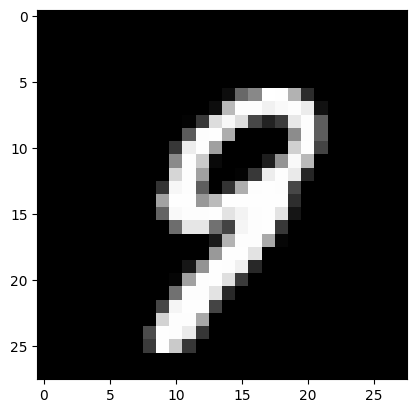

Prediction:  [2]
Label:  2


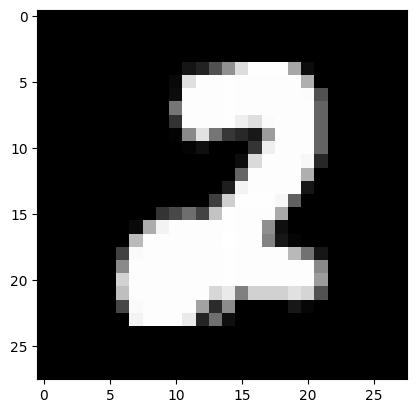

Prediction:  [2]
Label:  2


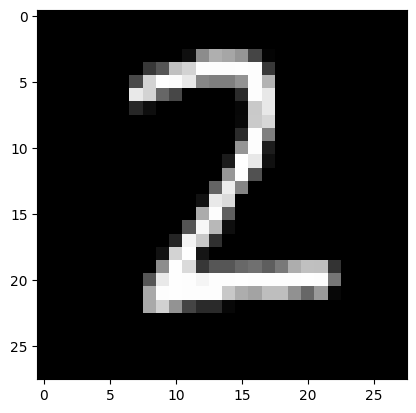

In [ ]:
test_prediction(0, W1, b1, W2, b2,W3,b3,W4,b4)
test_prediction(1, W1, b1, W2, b2,W3,b3,W4,b4)
test_prediction(2, W1, b1, W2, b2,W3,b3,W4,b4)
test_prediction(3, W1, b1, W2, b2,W3,b3,W4,b4)

In [ ]:
test_predictions = make_predictions(X_test, W1, b1, W2, b2, W3, b3, W4, b4)
get_accuracy(test_predictions, Y_test)

[9 9 8 6 8 0 0 0 4 1 7 8 8 3 0 3 9 9 5 3 0 7 7 5 9 6 6 7 4 4 0 3 6 1 7 9 5
 1 5 0 4 4 6 1 3 6 4 9 2 5 6 2 2 5 6 7 0 5 1 4 2 1 1 3 2 5 3 5 8 6 7 8 4 6
 4 3 6 1 4 0 2 5 8 6 5 5 9 9 1 4 1 4 8 2 1 0 0 6 4 8 8 4 0 3 3 0 7 8 8 0 1
 5 8 9 8 1 3 5 5 5 1 4 5 2 6 3 2 7 3 2 1 4 6 8 8 1 8 7 6 4 7 9 1 4 6 1 8 8
 1 4 5 5 0 7 6 9 1 7 4 4 9 6 9 8 1 7 9 7 6 1 7 4 9 9 8 2 1 4 8 1 0 8 2 5 3
 9 3 1 4 3 0 5 5 5 9 2 3 3 6 0 3 7 7 6 5 3 1 4 5 1 8 0 9 1 4 9 1 7 2 0 4 9
 7 8 2 1 2 1 6 7 0 6 0 9 8 2 2 0 5 0 8 1 0 1 9 7 4 4 0 6 7 4 4 8 0 0 5 7 9
 7 4 7 9 7 9 1 2 4 4 2 8 2 0 5 1 1 9 8 2 2 6 4 0 7 2 7 1 8 5 4 8 5 6 8 8 2
 7 2 3 4 6 5 9 4 0 8 9 2 0 3 4 8 3 0 9 2 2 6 8 6 8 6 4 1 5 6 0 2 5 6 7 9 9
 8 2 6 6 5 0 3 2 1 8 1 6 8 5 9 0 3 4 5 3 4 2 9 7 3 1 3 2 2 2 7 1 0 2 5 4 9
 1 1 4 0 8 1 8 1 2 3 4 5 1 6 1 7 7 1 4 7 7 6 6 3 2 9 6 3 5 7 3 3 2 2 9 8 8
 2 4 3 1 6 6 1 0 1 9 5 6 2 2 4 6 7 1 8 1 5 3 8 8 0 7 9 1 7 4 0 4 1 6 4 3 6
 7 5 6 6 6 5 6 4 0 2 2 0 5 7 0 9 1 7 4 0 6 6 6 2 0 4 9 6 4 0 3 6 1 9 3 8 5
 4 3 8 2 8 6 3 6 0 9 9 4 

0.862

# Dropout layer

In [ ]:
def init_params():
    W1 = np.random.rand(10, 784) - 0.5
    b1 = np.random.rand(10, 1) - 0.5
    W2 = np.random.rand(10, 10) - 0.5
    b2 = np.random.rand(10, 1) - 0.5
    return W1, b1, W2, b2

In [ ]:
def ReLU(Z):
    return np.maximum(Z, 0)

In [ ]:
def ReLU_deriv(Z):
    return Z > 0

In [ ]:
def softmax(Z):
    A = np.exp(Z) / sum(np.exp(Z))
    return A

In [ ]:
def forward_prop(W1, b1, W2, b2, X):
    Z1 = W1.dot(X) + b1
    A1 = ReLU(Z1)
    Z2 = W2.dot(A1) + b2
    A2 = softmax(Z2)
    return Z1, A1, Z2, A2

In [ ]:
def one_hot(Y):
    one_hot_Y = np.zeros((Y.size, Y.max() + 1))
    one_hot_Y[np.arange(Y.size), Y] = 1
    one_hot_Y = one_hot_Y.T
    return one_hot_Y

In [ ]:
def backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y):
    one_hot_Y = one_hot(Y)
    dZ2 = A2 - one_hot_Y
    dW2 = 1 / m * dZ2.dot(A1.T)
    db2 = 1 / m * np.sum(dZ2)
    dZ1 = W2.T.dot(dZ2) * ReLU_deriv(Z1)
    dW1 = 1 / m * dZ1.dot(X.T)
    db1 = 1 / m * np.sum(dZ1)
    return dW1, db1, dW2, db2

In [ ]:
def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):
    W1 = W1 - alpha * dW1
    b1 = b1 - alpha * db1
    W2 = W2 - alpha * dW2
    b2 = b2 - alpha * db2
    return W1, b1, W2, b2

In [ ]:
def get_predictions(A2):
    return np.argmax(A2, 0)

In [ ]:
def get_accuracy(predictions, Y):
    print(predictions, Y)
    return np.sum(predictions == Y) / Y.size

In [ ]:
# Example predicted vector and ground truth vector
predicted = np.array([0, 1, 1, 0, 2])
ground_truth = np.array([0, 1, 1, 0, 3])

# Calculate accuracy
accuracy = get_accuracy(predicted, ground_truth)
print("Accuracy:", accuracy)

[0 1 1 0 2] [0 1 1 0 3]
Accuracy: 0.8


In [ ]:
def dropout_forward(X, keep_prob):
    D = np.random.rand(*X.shape) < keep_prob
    A = X * D / keep_prob
    return A, D

def visualize_dropout(original_data, dropout_data, dropout_mask):
    fig, axs = plt.subplots(1, 3, figsize=(12, 4))

    axs[0].imshow(original_data.reshape(28, 28), cmap='gray')
    axs[0].set_title("Original Data")

    axs[1].imshow(dropout_mask.reshape(28, 28), cmap='gray')
    axs[1].set_title("Dropout Mask")

    axs[2].imshow(dropout_data.reshape(28, 28), cmap='gray')
    axs[2].set_title("Data with Dropout")

    for ax in axs:
        ax.axis('off')

    plt.tight_layout()
    plt.show()

# # Example usage
# input_size, m = X_train.shape # Number of examples
# X = X_train.copy()
# keep_prob = 0.8

# # Select a random example index for visualization
# example_index = np.random.randint(0, m)
# print(example_index)
# example_data = X[:, example_index].reshape(input_size, 1)

# A, D = dropout_forward(example_data, keep_prob)
# visualize_dropout(example_data, A, D)


In [ ]:
def gradient_descent(X, Y, alpha, iterations, keep_prob):
    W1, b1, W2, b2 = init_params()
    accuracy_scores = []
    for i in range(iterations):
        A, D = dropout_forward(X, keep_prob)
        Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, A)
        dW1, db1, dW2, db2 = backward_prop(Z1, A1, Z2, A2, W1, W2, A, Y)
        W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)
        if i % 10 == 0:
            print("Iteration: ", i)
            predictions = get_predictions(A2)
            accuracy = get_accuracy(predictions, Y)
            print(accuracy)
            accuracy_scores.append((i, accuracy))

    # Convert accuracy_scores to separate lists for plotting
    iterations, accuracies = zip(*accuracy_scores)

    # Plotting accuracy vs iterations
    plt.plot(iterations, accuracies)
    plt.xlabel('Iterations')
    plt.ylabel('Accuracy')
    plt.title('Accuracy vs Iterations')
    plt.show()

    return W1, b1, W2, b2

Iteration:  0
[0 0 2 ... 9 5 3] [6 8 1 ... 8 0 2]
0.09907317073170732
Iteration:  10
[0 0 2 ... 3 5 3] [6 8 1 ... 8 0 2]
0.12409756097560976
Iteration:  20
[1 9 2 ... 6 0 3] [6 8 1 ... 8 0 2]
0.18482926829268292
Iteration:  30
[8 0 6 ... 6 0 3] [6 8 1 ... 8 0 2]
0.25053658536585366
Iteration:  40
[2 9 1 ... 6 0 6] [6 8 1 ... 8 0 2]
0.29778048780487804
Iteration:  50
[4 9 1 ... 6 0 3] [6 8 1 ... 8 0 2]
0.34019512195121954
Iteration:  60
[7 8 1 ... 5 0 3] [6 8 1 ... 8 0 2]
0.37909756097560976
Iteration:  70
[6 1 1 ... 5 0 3] [6 8 1 ... 8 0 2]
0.4141951219512195
Iteration:  80
[7 8 1 ... 6 0 1] [6 8 1 ... 8 0 2]
0.4448536585365854
Iteration:  90
[2 8 1 ... 6 0 6] [6 8 1 ... 8 0 2]
0.47236585365853656
Iteration:  100
[2 4 1 ... 1 0 1] [6 8 1 ... 8 0 2]
0.49978048780487805
Iteration:  110
[6 8 1 ... 5 0 1] [6 8 1 ... 8 0 2]
0.5263170731707317
Iteration:  120
[6 3 1 ... 6 0 3] [6 8 1 ... 8 0 2]
0.5459024390243903
Iteration:  130
[8 8 8 ... 6 0 1] [6 8 1 ... 8 0 2]
0.5600243902439025
Iteratio

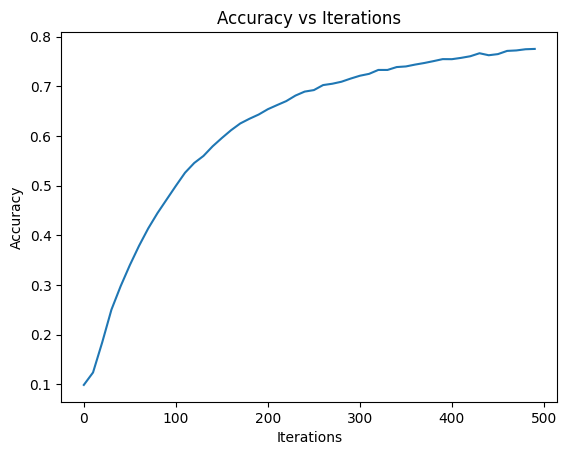

In [ ]:
keep_prob = 0.8
W1, b1, W2, b2 = gradient_descent(X_train, Y_train, 0.10, 500, keep_prob)

In [ ]:
def make_predictions(X, W1, b1, W2, b2):
    _, _, _, A2 = forward_prop(W1, b1, W2, b2, X)
    predictions = get_predictions(A2)
    return predictions

In [ ]:
def test_prediction(index, W1, b1, W2, b2):
    current_image = X_train[:, index, None]
    prediction = make_predictions(X_train[:, index, None], W1, b1, W2, b2)
    label = Y_train[index]
    print("Prediction: ", prediction)
    print("Label: ", label)

    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()

Prediction:  [6]
Label:  6


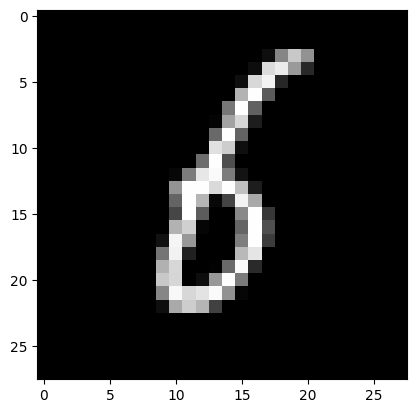

Prediction:  [8]
Label:  8


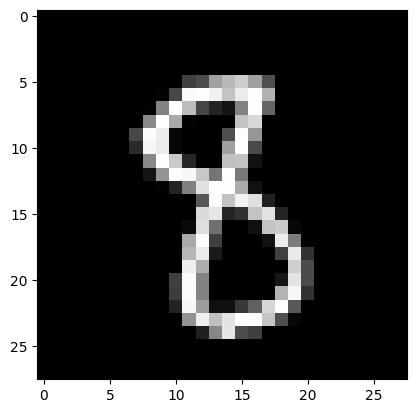

Prediction:  [1]
Label:  1


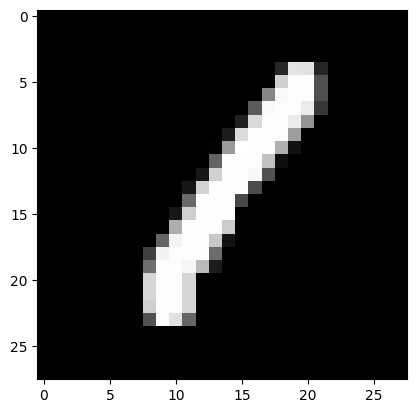

Prediction:  [4]
Label:  4


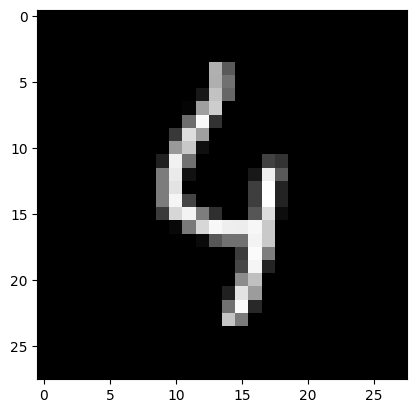

In [ ]:
test_prediction(0, W1, b1, W2, b2)
test_prediction(1, W1, b1, W2, b2)
test_prediction(2, W1, b1, W2, b2)
test_prediction(3, W1, b1, W2, b2)

In [ ]:
test_predictions = make_predictions(X_test, W1, b1, W2, b2)
get_accuracy(test_predictions, Y_test)

[1 5 9 9 9 3 2 1 8 4 1 6 0 8 2 2 1 3 5 5 3 6 1 0 7 8 5 9 8 9 2 3 6 1 0 1 3
 4 2 5 8 2 7 9 4 0 1 8 2 0 8 1 9 4 8 2 3 4 7 8 9 4 8 8 9 2 6 1 8 1 2 0 3 2
 7 2 1 8 6 0 5 4 1 3 2 8 3 9 6 7 2 9 8 6 8 7 9 2 6 4 2 1 5 9 3 5 4 5 4 9 4
 9 6 5 6 7 3 2 0 0 0 4 8 5 2 9 4 8 0 9 9 4 5 9 5 3 1 2 3 0 4 6 8 3 4 4 7 7
 2 2 4 9 8 7 3 3 4 8 6 0 6 2 2 4 4 8 0 8 7 0 2 6 4 9 5 5 9 8 0 1 2 2 3 1 7
 7 4 1 3 1 2 1 4 0 1 0 1 9 6 3 8 4 5 1 4 5 8 7 1 2 7 2 1 8 0 6 6 3 9 5 6 1
 8 9 7 1 6 8 8 7 6 7 9 6 8 7 9 0 6 3 7 6 2 6 3 8 4 4 8 9 6 1 7 1 7 1 2 8 9
 6 7 6 9 1 3 7 9 5 4 1 5 3 7 3 7 2 0 6 4 7 5 0 8 6 1 6 0 9 5 9 2 7 5 7 8 9
 3 1 9 7 7 7 1 7 9 8 7 6 3 4 9 6 3 0 2 8 5 5 8 0 8 0 3 9 8 4 9 0 9 4 9 6 0
 3 3 9 9 8 5 1 2 9 4 5 4 4 7 7 3 6 6 4 8 0 9 4 1 2 9 3 9 3 0 2 2 3 8 6 0 7
 6 7 1 9 3 0 9 4 8 7 1 7 3 0 2 1 5 7 0 2 1 0 1 6 8 4 8 8 9 6 2 0 3 6 8 3 7
 7 0 1 4 3 4 1 3 8 3 9 9 2 7 3 3 3 9 6 5 9 6 5 3 3 9 5 3 7 6 0 5 4 6 7 5 9
 4 9 5 8 1 4 1 5 4 1 6 4 9 9 9 0 5 7 7 5 1 2 0 6 3 5 2 3 2 0 3 7 9 7 9 9 5
 7 9 6 0 4 4 6 2 5 6 0 2 

0.841